# Vehicle price prediction using Machine Learning

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

**Task Statement**

- Develop models to predict price of used car. We are to train different models with various hyperparameters (You should make at least two different models, but more is better. Remember, various implementations of gradient boosting don't count as different models.) The main point of this step is to compare gradient boosting methods with random forest, decision tree, and linear regression.
- Analyze the speed and quality of the models.

## Data description

The dataset is stored in file `/datasets/car_data.csv`

**Features**

- DateCrawled — date profile was downloaded from the database
- VehicleType — vehicle body type
- RegistrationYear — vehicle registration year
- Gearbox — gearbox type
- Power — power (hp)
- Model — vehicle model
- Mileage — mileage (measured in km due to dataset's regional specifics)
- RegistrationMonth — vehicle registration month
- FuelType — fuel type
- Brand — vehicle brand
- NotRepaired — vehicle repaired or not
- DateCreated — date of profile creation
- NumberOfPictures — number of vehicle pictures
- PostalCode — postal code of profile owner (user)
- LastSeen — date of the last activity of the user

**Target**
- Price — price (Euro)

## Objectives

The objectives of this project is to:
- Develop a model to predict the price of used car
- Analyze the speed and quality of prediction, time required for training.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#prepare_the_data">Data preparation</a></li>
        <li><a href="#model_training">Model training</a></li>
        <li><a href="#model_analysis">Model analysis</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *matplotlib* and *seaborn* for visualization, and *sklearn* for machine learning algorithm development.

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import random

# import time for time computation
import timeit

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

from IPython.display import display

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# read the data
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/car_data.csv')
except:
    df = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Numerical Methods/car_data.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCo

None

----------------------------------------------------------------------------------------------------
Describe:



,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


----------------------------------------------------------------------------------------------------


,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,15470,8,2,250,7,40,2,109,18592
top,05/03/2016 14:25,sedan,manual,golf,petrol,volkswagen,no,03/04/2016 00:00,07/04/2016 07:16
freq,66,91457,268251,29232,216352,77013,247161,13719,654



Columns with nulls:
Column VehicleType has 10.5794% percent of Nulls, and 37490 of nulls
Column Gearbox has 5.5967% percent of Nulls, and 19833 of nulls
Column Model has 5.5606% percent of Nulls, and 19705 of nulls
Column FuelType has 9.2827% percent of Nulls, and 32895 of nulls
Column NotRepaired has 20.0791% percent of Nulls, and 71154 of nulls
There are 5 columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(354369, 16)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 262 duplicated rows.




**Conclusion**

By looking at the general information on the data, we can see that the data contains 354,369 rows and 16 columns. There are 5 columns with missing values. The missing values in the dataset are mostly missing at random (MAR). In some cases, these missing values are visible error during data compilation, or data omission. Since these columns are important to our model building process, we will look for a way to fill-in the missing values. It should be noted that the `sonstige_autos` brand is missing values not at random(MNAR). From the data, we have 262 duplicated rows which we have to deal with. We also need to convert datatype for some features.  

<div id="prepare_the_data">
    <h2>Data preparation</h2> 
</div>

The first step in data preparation is to replace the column names.

### Replace the column names

In [5]:
# rename columns
df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType': 'vehicle_type', 'RegistrationYear': 'registration_year', 'Gearbox': 'gearbox',
       'Power': 'power', 'Model': 'model', 'Mileage': 'mileage', 'RegistrationMonth': 'registration_month', 'FuelType': 'fuel_type', 'Brand': 'brand',
       'NotRepaired': 'not_repaired', 'DateCreated': 'date_created', 'NumberOfPictures': 'number_of_pictures', 'PostalCode': 'postal_code', 'LastSeen': 'last_seen'})

### Dealing with missing values

In [6]:
# function to calculate the percentage of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# check missing data
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
not_repaired,71154,20.1
vehicle_type,37490,10.6
fuel_type,32895,9.3
gearbox,19833,5.6
model,19705,5.6


We can see that `not_repaired` has 20.1% missing values, while `vehicle_type`, `fuel_type`, `gearbox` and `model` have less than 10% missing value. We can decide to drop missing values less than 10% but a better way to deal with the missing value is to fill it systematically using the property of the data.

#### Prepare `model` features

In [8]:
# function to replace missing values
def replace_missing_value(unique_value_feature, col_to_replace):  
    """
    This function is used to replace missing value in a column
    using possible unique value feature for those missing values    
    """
    # get unique value of feature from this dataframe
    for value in df[unique_value_feature].unique().tolist():
        # get specific value of features using possible value from column value to replace
        specific_value_df = df[df[unique_value_feature] == value].dropna()[col_to_replace]    
        value_replacement_list = specific_value_df.unique().tolist()
        # for the missing value, assign a random choice of the replacement value for that unknown value
        if value_replacement_list != []:
            df.loc[(df[unique_value_feature] == value) & (df[col_to_replace] != df[col_to_replace]), col_to_replace] = random.choice(value_replacement_list)
        else:
            df.loc[(df[unique_value_feature] == value) & (df[col_to_replace] != df[col_to_replace]), col_to_replace] = df[col_to_replace].mode() 

To replace missing values in the `model` column, we first get the unique value of vehicle brand, then get the list of specific brand with possible model for that brand. We then choose a random value from the list (excluding the nan values) and assign that to the missing `model` for that vehicle brand in the dataframe. For unique brand with an empty list, we use the most frequent value in the model column.

In [9]:
# replace missing value in `model` column
replace_missing_value('brand', 'model')

#### Prepare `vehicle_type` features

To replace missing values in the `vehicle_type` column, we first get the unique values of vehicle model, then get the list of specific model with possible vehicle type for that model. We then choose a random value from the list (excluding the nan values) and assign that to the missing `vehicle_type` for that vehicle model in the dataframe. For unique model with an empty list, we use the most frequent value in the vehicle type column.

In [10]:
# replace missing value in `vehicle type` column
replace_missing_value('model', 'vehicle_type')

#### Prepare `fuel_type` features

We apply similar strategy of replacing missing values to the `fuel_type` and `gearbox` features.

In [11]:
# replace missing value in `fuel_type` column
replace_missing_value('model', 'fuel_type')

#### Prepare `gearbox` features

In [12]:
# replace missing value in `gearbox` column
replace_missing_value('model', 'gearbox')

#### Prepare `not_repaired` features

For the `not_repaired` feature, there is no way to tell which listing was repaired or not so we fill missing values with a new category 'unknown'. 

In [13]:
# replace 'NaN' in the `not_repaired` column
df['not_repaired'].fillna('unknown', inplace=True)
df.not_repaired.value_counts()

no         247161
unknown     71154
yes         36054
Name: not_repaired, dtype: int64

In [14]:
# re-check to be sure no missing value
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
model,3374,1.0
gearbox,1104,0.3
fuel_type,1104,0.3
vehicle_type,1042,0.3


From the recheck for missing value, we see that we still have some values missing. We can look into the dataset to fish out the category with the missing value. From the dataframe with missing value, we can observe that most of the missing values are missing not at random (MNAR). This means that the `fuel_type`, `model`, `gearbox` and `vehicle type` across the rows are missing some value. A critical look will show that the `sonstige_autos` brand has 'NaN' as brand name. Since this represents a brand category, dropping the rows with missing value may introduce bias in our dataset. The best option will be to fill the missing values with 'unknown' rather than dropping the `sonstige_autos` brand from the dataset.

In [15]:
# dataframe with missing value
df[(df['model'].isnull()) & (df['brand'] == 'sonstige_autos')]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
59,29/03/2016 15:48,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,unknown,29/03/2016 00:00,0,53721,06/04/2016 01:44
306,21/03/2016 14:38,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,unknown,21/03/2016 00:00,0,6493,24/03/2016 02:47
431,20/03/2016 20:45,3950,small,2004,auto,5,NaN,70000,5,gasoline,sonstige_autos,no,20/03/2016 00:00,0,90562,03/04/2016 04:17
650,30/03/2016 11:55,15000,coupe,1971,NaN,0,NaN,5000,4,NaN,sonstige_autos,no,30/03/2016 00:00,0,51145,07/04/2016 02:45
661,01/04/2016 15:56,9900,suv,2000,auto,250,NaN,150000,4,lpg,sonstige_autos,no,01/04/2016 00:00,0,17309,07/04/2016 14:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354062,19/03/2016 11:25,6000,small,2008,manual,155,NaN,150000,5,petrol,sonstige_autos,no,19/03/2016 00:00,0,63069,07/04/2016 00:46
354073,19/03/2016 14:53,1750,NaN,1995,NaN,0,NaN,100000,12,NaN,sonstige_autos,unknown,19/03/2016 00:00,0,6188,01/04/2016 01:47
354083,30/03/2016 07:54,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,unknown,30/03/2016 00:00,0,6686,06/04/2016 23:46
354321,15/03/2016 13:52,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,15/03/2016 00:00,0,91186,17/03/2016 08:16


In [16]:
# replace 'NaN' in the new dataframe with 'unknown'
df.fillna(value='unknown', inplace=True)

In [17]:
#check for missing value
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Handling duplicates

We handle duplicated values by dropping duplicated rows from the dataset

In [18]:
n_duplicated = df.duplicated().sum()

# drop duplicates
df = df.drop_duplicates()
print(f'We handled duplicates by dropping {n_duplicated} duplicated rows giving us {df.shape[0]} total rows in dataset')

We handled duplicates by dropping 266 duplicated rows giving us 354103 total rows in dataset


In [19]:
# describe the data
df.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code
count,354103.000000,354103.000000,354103.000000,354103.000000,354103.000000,354103.0,354103.000000
mean,4416.406562,2004.235335,110.089779,128212.073888,5.714159,0.0,50507.038201
std,4514.325019,90.261676,189.915983,37906.662457,3.726671,0.0,25784.281604
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


We have been able to handle missing values in the categorical columns by imputation with the mode based on the property and relationships among features in the dataset. We noticed that majority of the missing values are Missing at random (MAR) so imputation was a better way to handle the missing values. A critical look at the data shows the `sonstige_autos` brand had its data missing not at random (MNAR). To handle this, we filled the missing values with 'unknown' rather than dropping the `sonstige_autos` brand from the dataset. A brief description of the data shows that the data is skewed and there could be present of outliers in the `price` and `power` features. For instance, the maximum value for `power` is 20,000. Now we proceed to change datatypes and carry-out some feature engineering.

### Change Datatypes

In [20]:
# change data to the right type
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
change_datatype(df, ['date_crawled', 'date_created', 'last_seen'], 'datetime64[ns]')
change_datatype(df, ['price', 'registration_year', 'power', 'registration_month', 'number_of_pictures'], 'int32')

In [21]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354103 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354103 non-null  datetime64[ns]
 1   price               354103 non-null  int32         
 2   vehicle_type        354103 non-null  object        
 3   registration_year   354103 non-null  int32         
 4   gearbox             354103 non-null  object        
 5   power               354103 non-null  int32         
 6   model               354103 non-null  object        
 7   mileage             354103 non-null  int64         
 8   registration_month  354103 non-null  int32         
 9   fuel_type           354103 non-null  object        
 10  brand               354103 non-null  object        
 11  not_repaired        354103 non-null  object        
 12  date_created        354103 non-null  datetime64[ns]
 13  number_of_pictures  354103 no

Now we have our data in the right datatype and reduced memory usage by using `int32` instead of `int64`. This may come in handy during model training.

### Feature engineering

In [22]:
# add new features to tdata
df['age'] = df['date_crawled'].dt.year - df['registration_year']
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,age
0,2016-03-24 11:52:00,480,coupe,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-07-04 03:16:00,23
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,a1,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-07-04 01:46:00,5
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-05-04 12:47:00,12
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00,15
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-06-04 10:17:00,8


**Conclusion**

Now our data is cleaned and ready for model building and analysis. We can carry out exploratory data analysis and check for outlier in the data and remove them if any. From the description of the data, we can see in the 

### Exploratory Data Analysis

In [23]:
# function to plot correlation matrix for used car data
def corr_matrix(df, label):
    plt.figure(figsize=(8,6))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Correlation matrix for ' + label)
    plt.show()
    
# function to plot seaborn barplot
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # create grouped data
    data = df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(12,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);

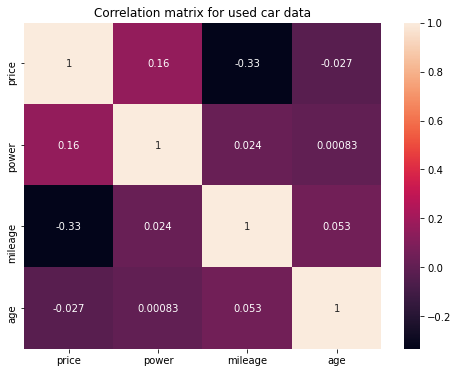

In [24]:
# correlation matrix
corr_df = df[['price', 'power', 'mileage', 'age']]
corr_matrix(corr_df, 'used car data')

We use the correlation plot (even though it depicts linear correlation amongst variables) to see if any correlation exists amongst some selected variables. We found little or no correlation among those selected variables.

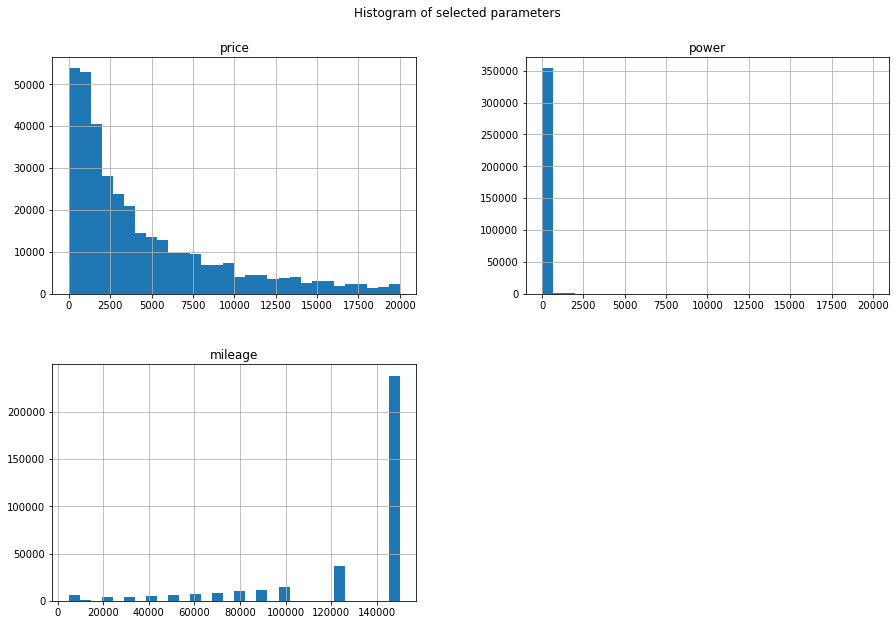

In [25]:
# histogram of selected variables
df[['price', 'power', 'mileage']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters', y=0.95);

We plotted the histogram of some features to look at the distribution and check for any anomaly in the data. The distribution plot for `price` shows that most cars are sold between 0 to 7500 euro. Also, majority of the cars have `mileage` greater than 140,000 miles which is expected for a used car. One anomaly we observe is in the `power` feature where we observe that some cars have horsepower greater than 2000 hp. This seems like an outlier and should be removed.   

In [26]:
# populate the list of numeric and categorical attributes
num_list = []
cat_list = []
plot_data = df[['price', 'vehicle_type', 'gearbox', 'power', 'mileage', 'fuel_type', 'brand', 'not_repaired']]

for column in plot_data:
    if is_numeric_dtype(plot_data[column]):
        num_list.append(column)
    elif is_string_dtype(plot_data[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

['price', 'power', 'mileage']
['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'not_repaired']


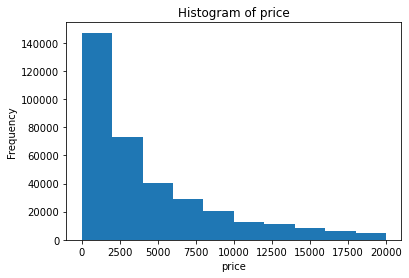

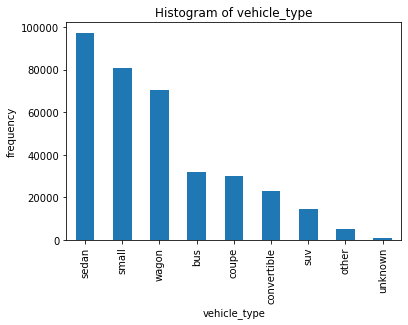

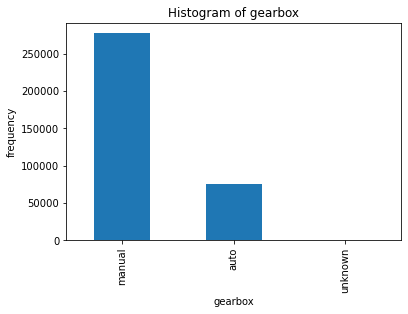

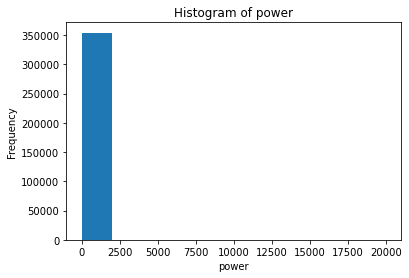

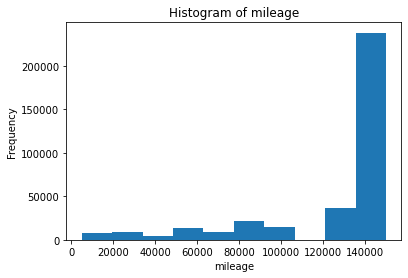

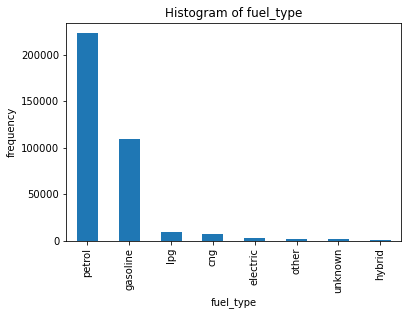

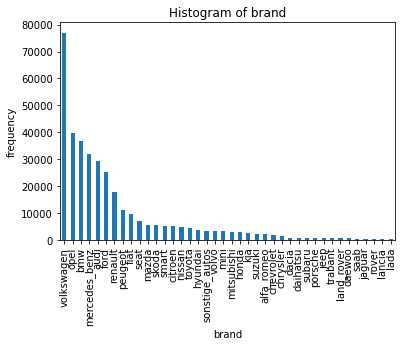

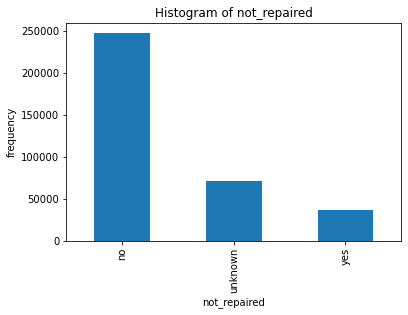

In [27]:
# create histogram and bar chart
for column in plot_data:
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.title('Histogram of ' + column)
    if is_numeric_dtype(plot_data[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(plot_data[column]):
        df[column].value_counts().plot(kind = 'bar')

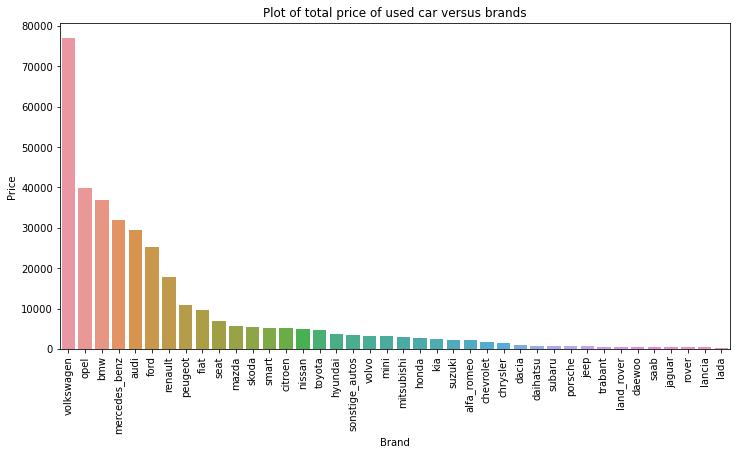

In [28]:
# top selling vehicle brands
plot_snsbar(df, 'brand', 'price', 'Plot of total price of used car versus brands')

**Conclusion**

From the visualization done, we can see that the top 10 selling brands in terms of price are *volkswagen, opel, bmw, mercedes benz, audi, ford, renault, peugeot, fiat and seat*. The most sold vehicle is the *sedan* and the *manual* gearbox had the most representation amongst vehicles sold. We have more cars which have not been repaired being represented in the data. Most cars sold either use *petrol or gasoline*. 

### Outlier detection

We filter out the data for vehicle less than 5000 hp since the highest horsepower car ever built is the [Devel Sixteen](https://www.financialexpress.com/auto/gallery/12300-cc-5000-hp-meet-devel-sixteen-the-hypercar-born-to-give-bugatti-and-henessey-nightmares/photos/935068/) at 5000 hp.

In [59]:
# filtered full data without anomaly
df_filtered = df[df['power'] <= 5000]
print(f'The shape of the new dataset is: {df_filtered.shape}')
print()
df_filtered.describe()

The shape of the new dataset is: (354021, 17)



,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code,age
count,354021.000000,354021.000000,354021.000000,354021.000000,354021.000000,354021.0,354021.000000,354021.000000
mean,4416.635420,2004.235540,107.618847,128214.498575,5.714181,0.0,50507.676389,11.764460
std,4514.470095,90.272031,77.639795,37903.278537,3.726571,0.0,25784.250595,90.272031
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,-7983.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000,8.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000,13.000000
75%,6400.000000,2008.000000,142.000000,150000.000000,9.000000,0.0,71083.000000,17.000000
max,20000.000000,9999.000000,5000.000000,150000.000000,12.000000,0.0,99998.000000,1016.000000


In [56]:
df[df['age'] <= 0]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,age
16,2016-01-04 12:46:00,300,sedan,2016,manual,60,polo,150000,0,petrol,volkswagen,unknown,2016-01-04,0,38871,2016-01-04 12:46:00,0
22,2016-03-23 14:52:00,2900,suv,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23,0,49716,2016-03-31 01:16:00,-2
26,2016-10-03 19:38:00,5555,small,2017,manual,125,c4,125000,4,petrol,citroen,no,2016-10-03,0,31139,2016-03-16 09:16:00,-1
31,2016-03-29 16:57:00,899,wagon,2016,manual,60,clio,150000,6,petrol,renault,unknown,2016-03-29,0,37075,2016-03-29 17:43:00,0
35,2016-08-03 07:54:00,350,coupe,2016,manual,75,golf,150000,4,petrol,volkswagen,no,2016-08-03,0,19386,2016-08-03 09:44:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354198,2016-10-03 23:36:00,1350,coupe,2016,manual,0,clk,150000,8,petrol,mercedes_benz,yes,2016-10-03,0,26427,2016-03-13 02:45:00,0
354203,2016-03-17 00:56:00,2140,bus,2018,manual,80,fiesta,150000,6,gasoline,ford,no,2016-03-17,0,44866,2016-03-29 15:45:00,-2
354253,2016-03-25 09:37:00,1250,coupe,2018,auto,0,corsa,150000,0,petrol,opel,unknown,2016-03-25,0,45527,2016-06-04 07:46:00,-2
354289,2016-05-03 14:55:00,5000,coupe,2017,manual,120,other,150000,7,cng,citroen,yes,2016-05-03,0,15518,2016-05-04 11:48:00,-1


<div id="model_training">
    <h2>Model training</h2> 
</div>

<div id="model_analysis">
    <h2>Model analysis</h2> 
</div>

<div id="conclusion">
    <h2>Conclusion</h2> 
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed